In [19]:
import numpy as np
import pandas as pd
import pynapple as nap
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter, rotate
from spatial_manifolds.data.binning import get_bin_config
from spatial_manifolds.data.loading import load_session
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
mouse = 25
day = 19
session_type = 'VR'
sorter = 'kilosort4'
storage = Path('/Users/harryclark/Downloads/COHORT12_nolfp/')
alpha = 0.001
n_jobs = 8
n_shuffles = 100
seed = 1

class Args:
    def __init__(self,mouse,day,session_type,sorter,storage,alpha,n_jobs,n_shuffles,seed):
        self.mouse = mouse
        self.day = day
        self.session_type = session_type
        self.sorter = sorter
        self.storage = storage
        self.alpha = alpha
        self.n_jobs = n_jobs
        self.n_shuffles = n_shuffles
        self.seed = seed
args = Args(mouse,day,session_type,sorter,storage,alpha,n_jobs,n_shuffles,seed)

if session_type == 'VR':
    tl = 200
elif session_type == 'MCVR':
    tl = 230
bin_config = get_bin_config(session_type)['P']



In [21]:
# Load session
session, session_path, neurons = load_session(args)
tuning_scores = {
    path.with_suffix('').name: pd.read_parquet(path)
    for path in (session_path / 'tuning_scores').iterdir()
}

In [22]:

def compute_autocorrelogram(spike_times, bin_size=1.0, window_size=100.0):
    """
    Compute the spike autocorrelogram.

    Parameters:
    spike_times (list or np.array): Array of spike times.
    bin_size (float): Size of each bin in the histogram (in the same units as spike_times).
    window_size (float): Size of the window for the autocorrelogram (in the same units as spike_times).

    Returns:
    bins (np.array): Array of bin centers.
    counts (np.array): Array of counts in each bin.
    """
    spike_times = np.array(spike_times)
    n_spikes = len(spike_times)
    
    # Compute all pairwise differences
    diffs = np.subtract.outer(spike_times, spike_times).flatten()
    
    # Remove zero-lag (self-pairs)
    diffs = diffs[diffs != 0]
    
    # Create histogram
    bins = np.arange(-window_size, window_size + bin_size, bin_size)
    counts, _ = np.histogram(diffs, bins=bins)
    
    # Normalize by number of spikes and bin size
    counts = counts / (n_spikes * bin_size)
    
    # Compute bin centers
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    return bin_centers, counts

In [23]:
ENTm1_neurons = neurons[neurons.brain_region == 'ENTm1'] # be specific to a location

autocorrs_10ms = {}
for index in ENTm1_neurons.index:
    this_neuron = ENTm1_neurons[ENTm1_neurons.index == index]
    spike_times = np.array(this_neuron[index].index)
    bin_size=0.001
    window_size=0.01
    bins, counts = compute_autocorrelogram(spike_times, bin_size, window_size)
    autocorrs_10ms[index] = counts



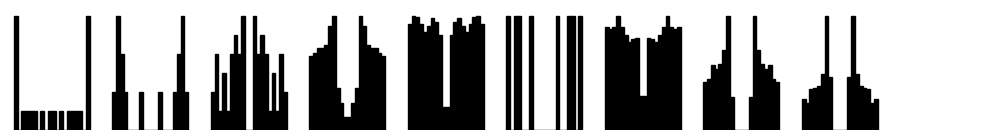

In [24]:
# Plot
ncols = 10
nrows = int(np.ceil(len(autocorrs_10ms)/ncols))
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, 
                       figsize=(10, 3*(np.ceil(len(autocorrs_10ms)/6)/4)), squeeze=False)
counter = 0
for j in range(nrows):
    for i in range(ncols):
        if counter<len(autocorrs_10ms):
            index = ENTm1_neurons.index[counter]
            counts = autocorrs_10ms[index]
            ax[j, i].bar(bins, counts, width=bin_size, align='center', edgecolor='black', color='black')
        ax[j, i].set_xticks([])
        ax[j, i].set_yticks([])
        ax[j, i].xaxis.set_visible(False)
        ax[j, i].yaxis.set_visible(False)
        ax[j, i].spines['top'].set_visible(False)
        ax[j, i].spines['right'].set_visible(False)
        ax[j, i].spines['bottom'].set_visible(False)
        ax[j, i].spines['left'].set_visible(False)
        ax[j, i].xaxis.set_tick_params(labelbottom=False)
        ax[j, i].yaxis.set_tick_params(labelleft=False)
        counter+=1
plt.tight_layout()
plt.show()
fig.savefig('/Users/harryclark/Downloads/M25_D19_MECl1_10ms_ac.pdf')


In [25]:

ENTm1_neurons = neurons[neurons.brain_region == 'ENTm1'] # be specific to a location

autocorrs_250ms = {}
for index in ENTm1_neurons.index:
    this_neuron = ENTm1_neurons[ENTm1_neurons.index == index]
    spike_times = np.array(this_neuron[index].index)
    bin_size=0.01
    window_size=0.25
    bins, counts = compute_autocorrelogram(spike_times, bin_size, window_size)
    autocorrs_250ms[index] = counts


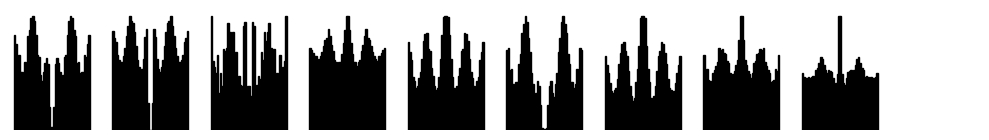

In [26]:
# Plot
ncols = 10
nrows = int(np.ceil(len(autocorrs_250ms)/ncols))
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, 
                       figsize=(10, 3*(np.ceil(len(autocorrs_250ms)/6)/4)), squeeze=False)
counter = 0
for j in range(nrows):
    for i in range(ncols):
        if counter<len(autocorrs_250ms):
            index = ENTm1_neurons.index[counter]
            counts = autocorrs_250ms[index]
            ax[j, i].bar(bins, counts, width=bin_size, align='center', edgecolor='black', color='black')
        ax[j, i].set_xticks([])
        ax[j, i].set_yticks([])
        ax[j, i].xaxis.set_visible(False)
        ax[j, i].yaxis.set_visible(False)
        ax[j, i].spines['top'].set_visible(False)
        ax[j, i].spines['right'].set_visible(False)
        ax[j, i].spines['bottom'].set_visible(False)
        ax[j, i].spines['left'].set_visible(False)
        ax[j, i].xaxis.set_tick_params(labelbottom=False)
        ax[j, i].yaxis.set_tick_params(labelleft=False)
        counter+=1
plt.tight_layout()
plt.show()
fig.savefig('/Users/harryclark/Downloads/M25_D19_MECl1_250ms_ac.pdf')

